In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

import warnings
warnings.simplefilter(action='ignore')
sns.set(rc={'figure.figsize': [7, 7]}, font_scale=1.2)
%matplotlib inline

In [2]:
df =pd.read_csv('Advertising.csv')
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [4]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [5]:
df.drop('Unnamed: 0', axis=1, inplace=True)

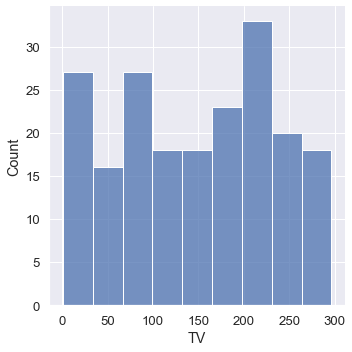

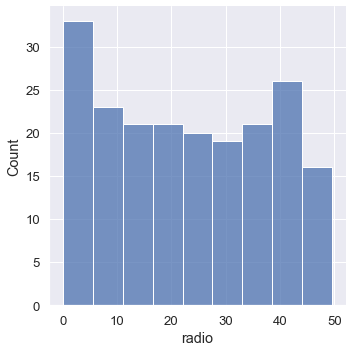

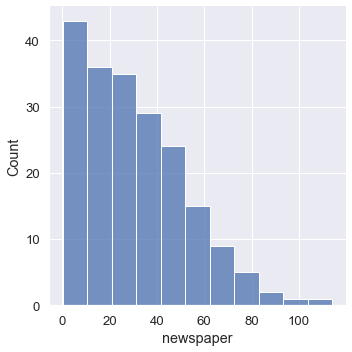

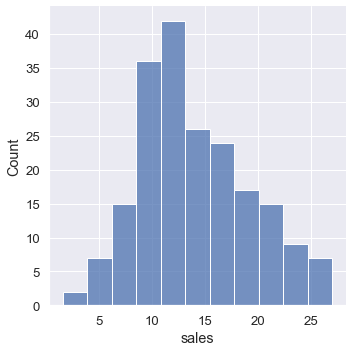

In [8]:
for col in df:
    sns.displot(df[col])
    plt.show()

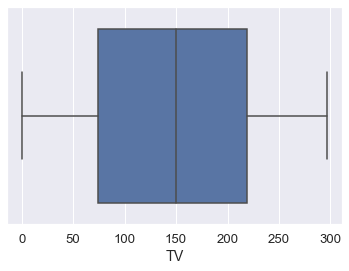

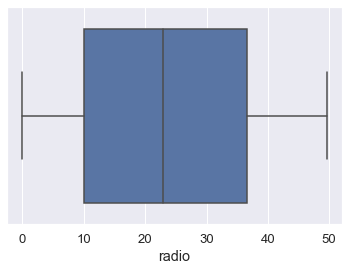

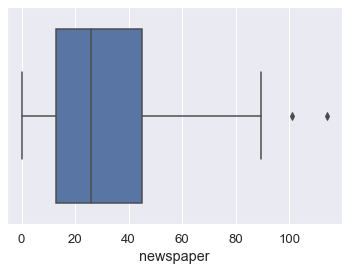

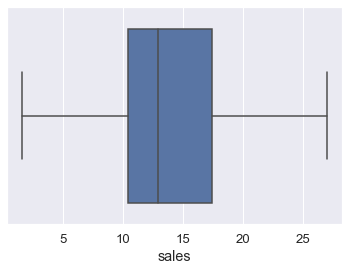

In [9]:
for col in df:
    sns.boxplot(df[col])
    plt.show()

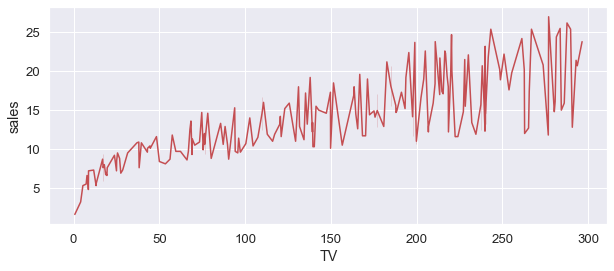

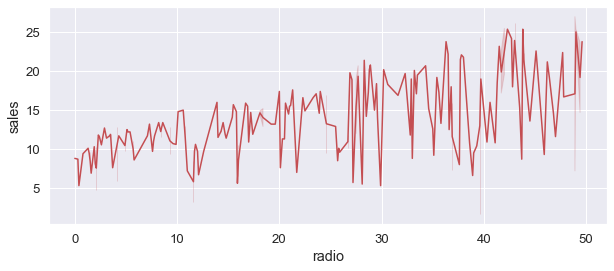

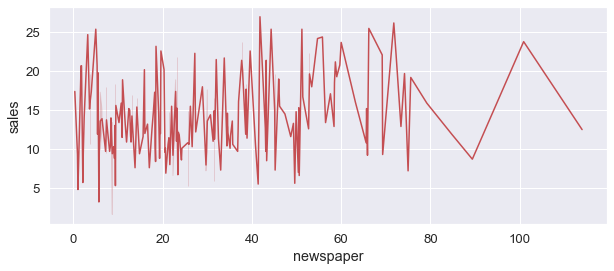

In [26]:
for col in df.columns[0:3]:
    plt.figure(figsize=(10,4))
    sns.lineplot(x = df[col], y=df['sales'], color='r')
    plt.show()

<AxesSubplot:>

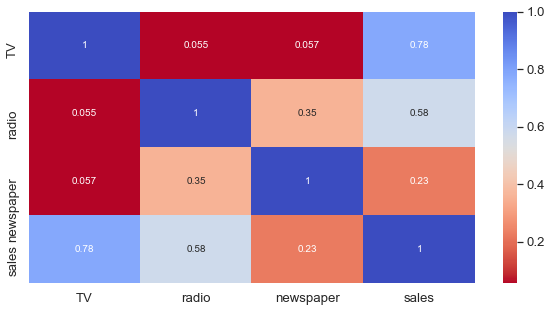

In [29]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm_r')

In [30]:
x = df.drop('sales', axis=1) 
y = df['sales']

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [36]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [37]:
models = {
    "LR": LinearRegression(),
    "DT": DecisionTreeRegressor(),
    "RF": RandomForestRegressor(),
    "XGBR": XGBRegressor(),
    "KNNR" : KNeighborsRegressor(), 
    "SVR": SVR()
}

In [38]:
for name, model in models.items():
    print('-'*30)
    print(f'Using model: {name}')
    
    model.fit(x_train, y_train)
    print(f'Training Score: {model.score(x_train, y_train)}')
    
    y_pred = model.predict(x_test)
    print(f'Test Score: {r2_score(y_test, y_pred)}')  

------------------------------
Using model: LR
Training Score: 0.9067114990146382
Test Score: 0.8601145185017868
------------------------------
Using model: DT
Training Score: 1.0
Test Score: 0.9319180848247437
------------------------------
Using model: RF
Training Score: 0.9967965605696386
Test Score: 0.9727533347328391
------------------------------
Using model: XGBR
Training Score: 0.9999999204005748
Test Score: 0.9756937384889485
------------------------------
Using model: KNNR
Training Score: 0.9625683541301726
Test Score: 0.9194250136690134
------------------------------
Using model: SVR
Training Score: 0.9274391957181525
Test Score: 0.8755669067510555
